In [1]:
import os
os.chdir('/Users/vish/Documents/gitrepos/p2investigatedata')

from csvReader import *
from fixDataType import *
from setOperations import *
from customMethods import *
from listAndDictOperations import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
 
# Option 1: Csv can be list of lists
# Option2: Csv can be dictionariy

enrollments_filename = 'data/enrollments.csv'
engagement_filename = 'data/daily_engagement.csv' 
submissions_filename = 'data/project_submissions.csv' 

# reading csv files
enrollments = read_csv(enrollments_filename)
daily_engagement = read_csv(engagement_filename)
project_submissions = read_csv(submissions_filename)

print "enrollment: ",enrollments[0]
print "\n daily_engagement : ",daily_engagement[0]
print "\n project_submissions: ", project_submissions[0]

enrollment:  {u'status': u'canceled', u'is_udacity': u'True', u'is_canceled': u'True', u'join_date': u'2014-11-10', u'account_key': u'448', u'cancel_date': u'2015-01-14', u'days_to_cancel': u'65'}

 daily_engagement :  {u'lessons_completed': u'0.0', u'num_courses_visited': u'1.0', u'total_minutes_visited': u'11.6793745', u'projects_completed': u'0.0', u'acct': u'0', u'utc_date': u'2015-01-09'}

 project_submissions:  {u'lesson_key': u'3176718735', u'processing_state': u'EVALUATED', u'account_key': u'256', u'assigned_rating': u'UNGRADED', u'completion_date': u'2015-01-16', u'creation_date': u'2015-01-14'}


In [2]:
for enrollment in enrollments:
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['account_key'] = parse_maybe_int(enrollment['account_key'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])

    
for engagement in daily_engagement:
   engagement['lessons_completed'] = int(float(engagement['lessons_completed']))
   engagement['num_courses_visited'] = int(float(engagement['num_courses_visited']))
   engagement['total_minutes_visited'] = float(engagement['total_minutes_visited'])
   engagement['projects_completed'] = int(float(engagement['projects_completed']))
   engagement['acct'] = int(engagement['acct'])
   engagement['utc_date'] = parse_date(engagement['utc_date'])   
   
for submission in project_submissions:
   submission['account_key'] = int(submission['account_key'])
   submission['lesson_key'] = int(submission['lesson_key'])
   submission['completion_date'] = parse_date(submission['completion_date']) 
   submission['creation_date'] = parse_date(submission['creation_date'])
   
   # adding a new key account key and value same as 'acct' and pop the 'acct'
# from the dictionary
for engagement in daily_engagement:
   engagement['account_key'] = int(engagement['acct'])
   engagement.pop('acct',None)

print "enrollment: ",enrollments[0]
print "\n daily_engagement : ",daily_engagement[0]
print "\n project_submissions: ", project_submissions[0]

print "\nNumber of enrollment records : " , len(enrollments)
print "\nNumber of daily engagement records : " , len(daily_engagement)
print "\nNumber of project submissions records : " , len(project_submissions)

enrollment:  {u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 10, 0, 0), u'account_key': 448, u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0), u'days_to_cancel': 65}

 daily_engagement :  {u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 11.6793745, u'projects_completed': 0, 'account_key': 0, u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

 project_submissions:  {u'lesson_key': 3176718735, u'processing_state': u'EVALUATED', u'account_key': 256, u'assigned_rating': u'UNGRADED', u'completion_date': datetime.datetime(2015, 1, 16, 0, 0), u'creation_date': datetime.datetime(2015, 1, 14, 0, 0)}

Number of enrollment records :  1640

Number of daily engagement records :  136240

Number of project submissions records :  3642


In [3]:
eSet = get_unique_set(enrollments,'account_key')
deSet =  get_unique_set(daily_engagement,'account_key')
psSet =  get_unique_set(project_submissions,'account_key')

print "\n Unique student keys in enrollments : ", len(eSet)
print "\n Unique student keys in daily engement : ", len(deSet)
print "\n Unique student keys in project submissions : ", len(psSet)


 Unique student keys in enrollments :  1302

 Unique student keys in daily engement :  1237

 Unique student keys in project submissions :  743


In [4]:
#Enrollment keys for missing daily engagement records
acct_keys_set_missing_de = get_key_set_not_in(eSet,deSet)

print "\nNumber of students with missed daily engagement records :", len(acct_keys_set_missing_de)

missed_enrollment_records = filter_data_with_keys(enrollments,'account_key',acct_keys_set_missing_de)

# some employee in the missed_enrollment records have same enrollment and cancel date or datys to cancel is not zero

missed_enrollment_records_days_to_cancel_is_not_zero = list()
for enrollment in missed_enrollment_records : 
    if enrollment['days_to_cancel'] != 0:
        missed_enrollment_records_days_to_cancel_is_not_zero.append(enrollment)

print "\n Number of students with missed daily engagement records and days to cancel is not zero : ", len(missed_enrollment_records_days_to_cancel_is_not_zero)


Number of students with missed daily engagement records : 65

 Number of students with missed daily engagement records and days to cancel is not zero :  3


In [5]:
# all the records in missed_enrollement_days_to_cancel_is_not_zero are the test records added by the udacity
#this is identified by the field is_udacity = false

udacity_test_accounts = get_udacity_test_account_set(enrollments)

non_udacity_enrollments = remove_udacity_test_accounts(enrollments,udacity_test_accounts)
non_udacity_daily_engagements = remove_udacity_test_accounts(daily_engagement,udacity_test_accounts)
non_udacity_project_submissions = remove_udacity_test_accounts(project_submissions,udacity_test_accounts)

print "\nNumber of original enrollment records : " , len(enrollments)
print "\nNumber of  new enrollment records : " , len(non_udacity_enrollments)


Number of original enrollment records : 

 1640

Number of  new enrollment records :  1622


In [6]:
paid_students = get_paid_students_dict(non_udacity_enrollments)

print "\n number of unique students who atleast stayed at least a week",len(paid_students)

paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments,paid_students)
paid_daily_engagements = remove_free_trial_cancels(non_udacity_daily_engagements,paid_students)
paid_project_submissions = remove_free_trial_cancels(non_udacity_project_submissions,paid_students)

paid_engagements_in_first_week = list()
for de in daily_engagement:
    account_key = de['account_key']
    if account_key in paid_students and within_one_week(paid_students[account_key],de['utc_date']):
        paid_engagements_in_first_week.append(de)

print "\n number of daily enrollment records within one week",len(paid_engagements_in_first_week)


 number of unique students who atleast stayed at least a week 995



 number of daily enrollment records within one week 6919



 mean :  306.708326753
 standard deviation : 412.996933409
 Minimum :  0.0
 Max :  3564.7332645


/Applications/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


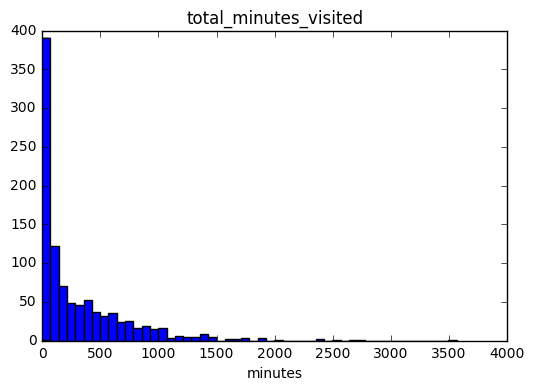

In [7]:
engagement_by_account = get_data_grouped_by_field(paid_engagements_in_first_week,'account_key')

# number of total minutes that student spent in this week
total_minutes_by_account = group_values_by_account(engagement_by_account,'total_minutes_visited')
describe_data(total_minutes_by_account.values(),bins=50,title='total_minutes_visited', xlabel='minutes')


 mean :  1.63618090452
 standard deviation : 3.00256129983
 Minimum :  0.0
 Max :  36.0


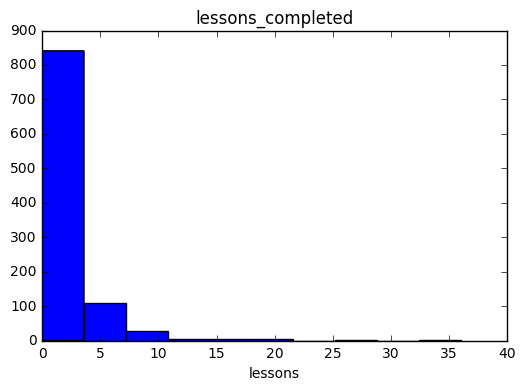

In [8]:
# Number of courses student completed within this week
total_lessons_completed_by_account = group_values_by_account(engagement_by_account,'lessons_completed')
describe_data(total_lessons_completed_by_account.values(),bins=10,title='lessons_completed', xlabel='lessons')


 mean :  2.86733668342
 standard deviation : 2.25519800292
 Minimum :  0.0
 Max :  7.0


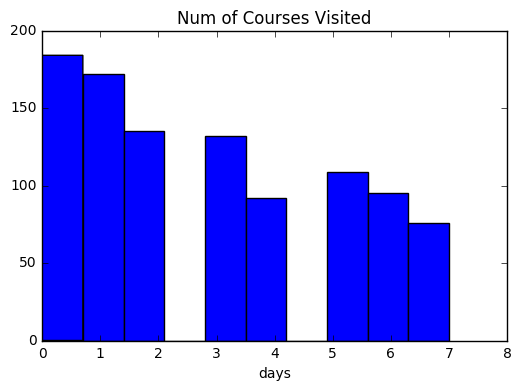

In [9]:
#No. of days each student has visited within this week
days_visited_by_account = group_no_of_valid_rows_by_account(engagement_by_account,'num_courses_visited')
describe_data(days_visited_by_account.values(),bins=10,title='Num of Courses Visited', xlabel='days')

In [10]:
subway_project_lesson_keys = [746169184, 3176718735]

passed_dict = get_proj_completion_dict(paid_project_submissions,subway_project_lesson_keys)

print "length of passed_dict : ", len(passed_dict)

passing_engagement = get_passing_engagementList(engagement_by_account,passed_dict,True)
non_passing_engagement = get_passing_engagementList(engagement_by_account,passed_dict,False)

print "number of passing engagement records : ",len(passing_engagement)
print "number of non passing engagement records : ",len(non_passing_engagement)

length of passed_dict :  647
number of passing engagement records :  4527
number of non passing engagement records :  2392



total_minutes_visited  - passed engagement metrics

 mean :  394.586046484
 standard deviation : 448.499519327
 Minimum :  0.0
 Max :  3564.7332645

total_minutes_visited  - non-passed engagement metrics

 mean :  143.326474267
 standard deviation : 269.538619011
 Minimum :  0.0
 Max :  1768.52274933


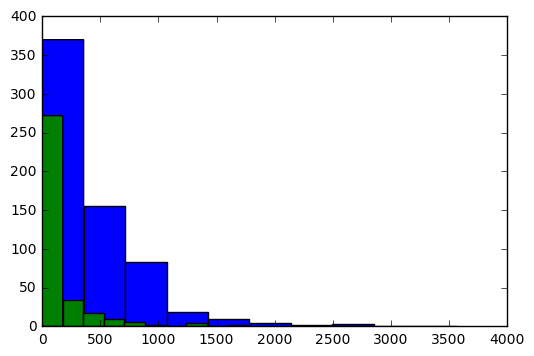

In [11]:
passing_engagement_by_account = get_data_grouped_by_field(passing_engagement,'account_key')
non_passing_engagement_by_account = get_data_grouped_by_field(non_passing_engagement,'account_key')

dataField = 'total_minutes_visited'
print "\n",dataField," - passed engagement metrics"
x1 = group_values_by_account(passing_engagement_by_account,dataField)
describe_data(x1.values())
print "\n",dataField," - non-passed engagement metrics"
x2 = group_values_by_account(non_passing_engagement_by_account,dataField)
describe_data(x2.values())


num_courses_visited  - passed engagement metrics

 mean :  3.38485316847
 standard deviation : 2.25882147092
 Minimum :  0.0
 Max :  7.0

num_courses_visited  - non-passed engagement metrics

 mean :  1.90517241379
 standard deviation : 1.90573144136
 Minimum :  0.0
 Max :  7.0


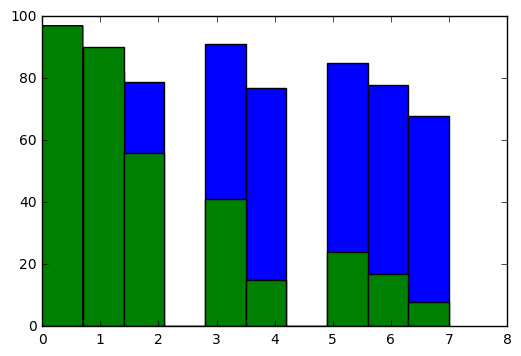

In [12]:
dataField = 'num_courses_visited'
print "\n", dataField, " - passed engagement metrics"
y1 = group_no_of_valid_rows_by_account(passing_engagement_by_account, dataField)
describe_data(y1.values())
print "\n", dataField, " - non-passed engagement metrics"
y2 = group_no_of_valid_rows_by_account(non_passing_engagement_by_account, dataField)
describe_data(y2.values())


lessons_completed  - passed engagement metrics

 mean :  2.05255023184
 standard deviation : 3.14222705558
 Minimum :  0.0
 Max :  36.0

lessons_completed  - non-passed engagement metrics

 mean :  0.862068965517
 standard deviation : 2.54915994183
 Minimum :  0.0
 Max :  27.0


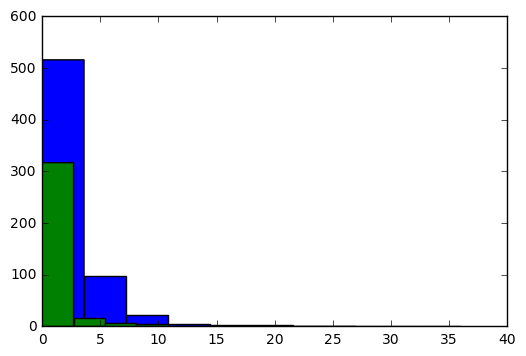

In [13]:
dataField = 'lessons_completed'
print "\n", dataField, " - passed engagement metrics"
z1 = group_values_by_account(passing_engagement_by_account, dataField)
describe_data(z1.values())
print "\n", dataField, " - non-passed engagement metrics"
z2 = group_values_by_account(non_passing_engagement_by_account, dataField)
describe_data(z2.values())


 mean :  2.05255023184
 standard deviation : 3.14222705558
 Minimum :  0.0
 Max :  36.0


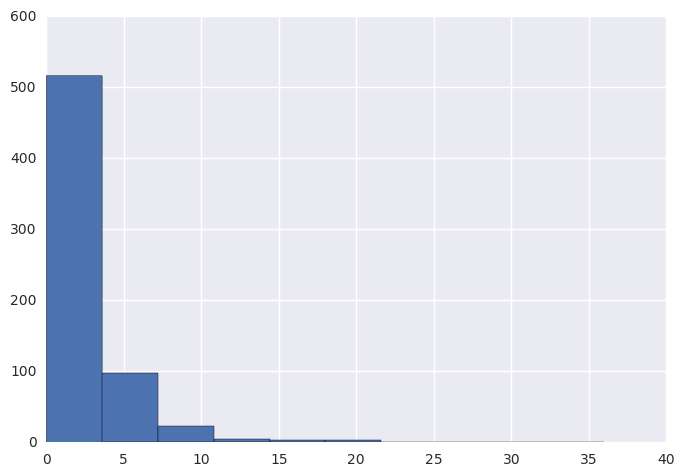

In [14]:
import seaborn as sns

# Seaborn automatically changes the graph neatly
describe_data(z1.values())